# Solving a partial differential equation

Equation:
$$
\nabla^2\phi - e^{-x}(x-2+y^3+6y) = 0
$$

Boundary conditions:
$$
\phi(0,y) =y^3\quad , \quad \phi(1,y)=(1+y^3)e^{-1}\\
\phi(x,0) = xe^{-x}\quad ,\quad \phi(x,1)=e^{-x}(x+1)
$$

In [1]:
import elvet


def equation(x, y, dy, d2y):
    return elvet.math.laplacian(d2y) - elvet.math.exp(-x[0])*(x[0] - 2 + x[1]**3 + 6 * x[1])


def analytical_solution(x):
    x1, x2 = elvet.unstack(x)
    return elvet.math.exp(-x1)*(x1 + x2**3)


def residuals(x, y, dy, d2y):
    return y - analytical_solution(x)


domain = elvet.box((0, 1, 11), (0, 1, 11))


result = elvet.solver(
    equations=equation,
    bcs=(
        elvet.BC(0, residuals, index=0),  # x_1 = 0
        elvet.BC(1, residuals, index=0),  # x_1 = 1
        elvet.BC(0, residuals, index=1),  # x_2 = 0
        elvet.BC(1, residuals, index=1),  # x_2 = 1
    ),
    domain=domain,
    model=elvet.nn(2, 10, 1),
    epochs=50000,
)

 Elvet: epoch = 1, loss = 1.31e+01, elapsed time = 00:00:02
 Elvet: epoch = 10000, loss = 8.10e-03, elapsed time = 00:00:10
 Elvet: epoch = 20000, loss = 2.28e-03, elapsed time = 00:00:17
 Elvet: epoch = 30000, loss = 1.67e-03, elapsed time = 00:00:24
 Elvet: epoch = 40000, loss = 1.41e-03, elapsed time = 00:00:30
 Elvet: epoch = 50000, loss = 1.25e-03, elapsed time = 00:00:36


**Summary of conventions for tensor shapes and indices** (in non-batch mode)

```python
x.shape == (2,)
x1, x2 = x[0], x[1]

# first derivative
dy.shape == (2, 1)
dy_dx1, dy_dx2 = dy[0, 0], dy[1, 0]

# second derivative 
d2y.shape == (2, 2, 1)  # d2y[x1dim, x2dim, ydim]
d2y_dx1dx1 = d2y[0, 0, 0]
d2y_dx1dx2 = d2y[0, 1, 0]
d2y_dx2dx2 = d2y[1, 1, 0]
```

## Checks

### Loss history

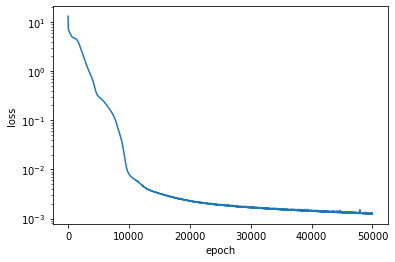

In [2]:
import elvet.plotting

elvet.plotting.plot_losses(result)

### Predictions

Compare the predictions of the trained model with the analytic solution:
$$
\phi(x,y) = e^{-x}(x+y^3)
$$
In 1D and 2D slices of the domain.

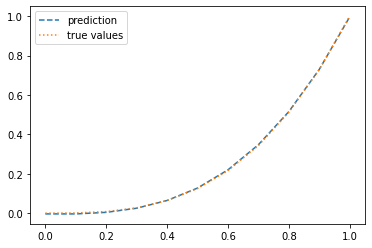

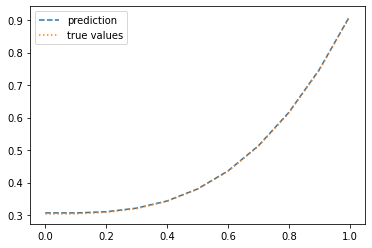

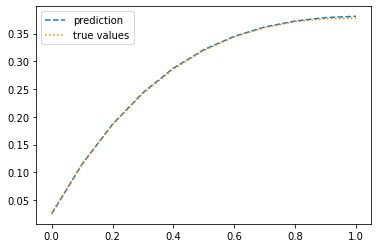

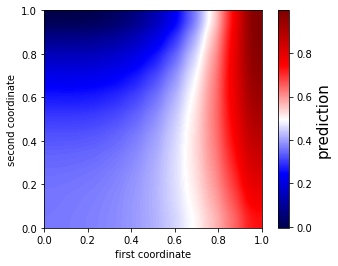

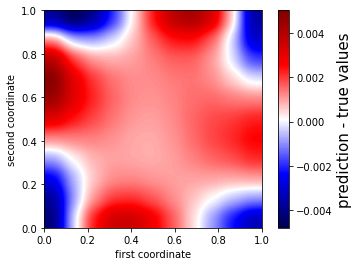

In [3]:
# plot x[0] = 0 section, should be equal to x[1]**3
elvet.plotting.plot_prediction(result, true_function=analytical_solution, section=(0, None))

# plot x[0] = 0.5 section
elvet.plotting.plot_prediction(result, true_function=analytical_solution, section=(0.5, None))

# plot x[1] = 0.3 section
elvet.plotting.plot_prediction(result, true_function=analytical_solution, section=(None, 0.3))

# plot 2d section (all values of prediction)
elvet.plotting.plot_prediction(result, section=(None, None))

# plot 2d section (prediction - analytical_solution)
elvet.plotting.plot_prediction(result, true_function=analytical_solution, section=(None, None))

### Loss density

Check what parts of the domain contribute the most to the total loss.

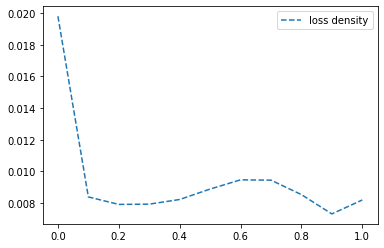

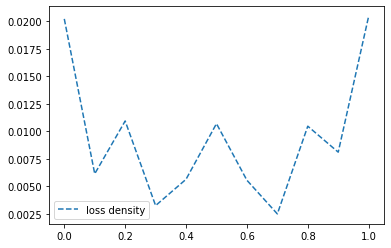

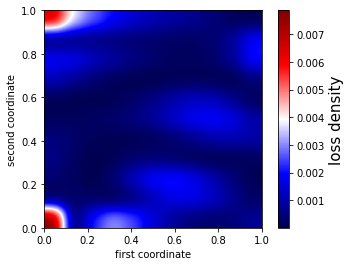

In [4]:
# plot 1d loss density along x1 axis
elvet.plotting.plot_loss_density(result, axis=0)

# plot 1d loss density along x2 axis
elvet.plotting.plot_loss_density(result, axis=1)

# plot 2d loss densitt
elvet.plotting.plot_loss_density(result, axis=(0, 1))